# Exploratory Data Analysis (EDA)
**Author**: Sameer Satpute  
**Date**: 02-01-2025  
**Description**: This notebook explores the `historic.csv` dataset, visualizes relationships, and identifies patterns relevant to predicting product success (`top` or `flop`).


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Configure plotting styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


**Load** **Data**

In [ ]:
# Load the dataset
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset into a DataFrame
historic_df = pd.read_csv("historic.csv")
# Preview the first few rows
historic_df.head()


Saving historic.csv to historic.csv


,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


# **Dataset** **Overview**

In [ ]:
# Display basic info about the dataset
historic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


**Dataset Shape**

In [ ]:
# Dataset shape
print(f"The dataset contains {historic_df.shape[0]} rows and {historic_df.shape[1]} columns.")


The dataset contains 8000 rows and 6 columns.


**Check for Missing Values and Duplicates**

In [ ]:
missing_values = historic_df.isnull().sum()
duplicates = historic_df.duplicated().sum()

print("\nMissing Values:\n", missing_values)
print(f"\nNumber of Duplicate Rows: {duplicates}")


Missing Values:
 item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

Number of Duplicate Rows: 0


Voila ,This data set has no missing values

# **Summary Statistics**

**Numerical and Categorical Features**

In [ ]:
print("\nSummary Statistics:\n", historic_df.describe(include="all"))


Summary Statistics:
               item_no category      main_promotion        color        stars  \
count     8000.000000     8000                8000         8000  8000.000000   
unique            NaN        6                   4           10          NaN   
top               NaN    Tunic  Category_Highlight  Multi-Color          NaN   
freq              NaN     1650                2432         1443          NaN   
mean    546474.338375      NaN                 NaN          NaN     3.473075   
std     256513.463874      NaN                 NaN          NaN     0.978810   
min     100171.000000      NaN                 NaN          NaN     0.300000   
25%     325001.500000      NaN                 NaN          NaN     2.800000   
50%     547081.000000      NaN                 NaN          NaN     3.500000   
75%     764312.250000      NaN                 NaN          NaN     4.200000   
max     989740.000000      NaN                 NaN          NaN     6.100000   

       success_in

In [ ]:
# Summary statistics for numerical columns
historic_df.describe()



,item_no,stars
count,8000.000000,8000.000000
mean,546474.338375,3.473075
std,256513.463874,0.978810
min,100171.000000,0.300000
25%,325001.500000,2.800000
50%,547081.000000,3.500000
75%,764312.250000,4.200000
max,989740.000000,6.100000


**As 'item_no' feature having all values are unique we can drop this feature as it will not help us in predicting output**

In [ ]:
historic_df = historic_df[['category','main_promotion','color','stars','success_indicator']]
historic_df.head()

,category,main_promotion,color,stars,success_indicator
0,Tunic,Catalog,Green,3.1,flop
1,Hoodie,Category_Highlight,Red,1.5,flop
2,Sweatshirt,Catalog,Red,4.4,top
3,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,Hoodie,Category_Highlight,Green,4.1,top


# **Distribution of Features**

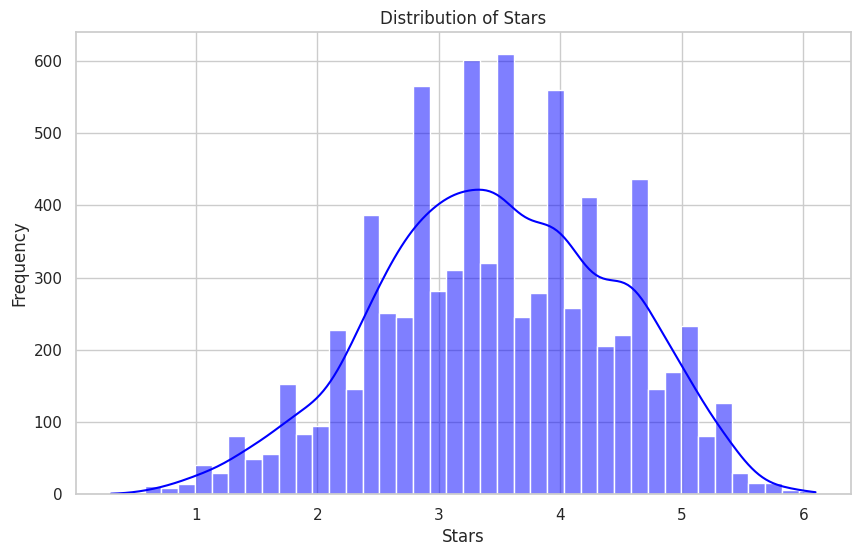

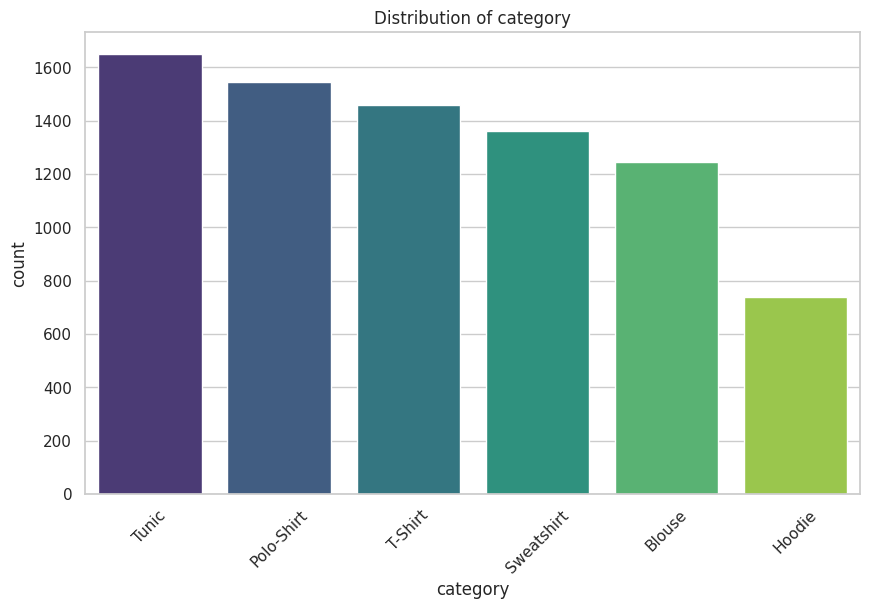

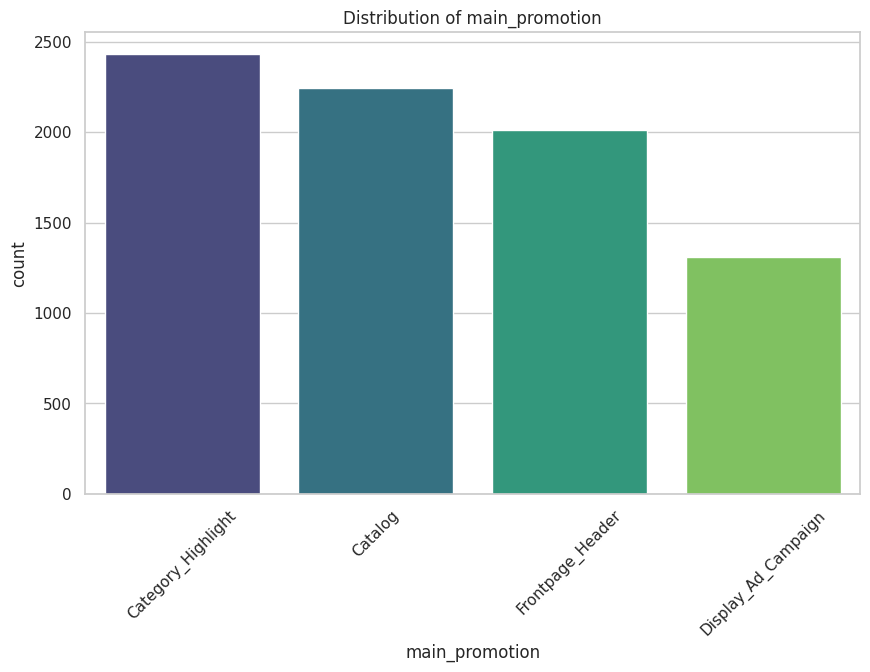

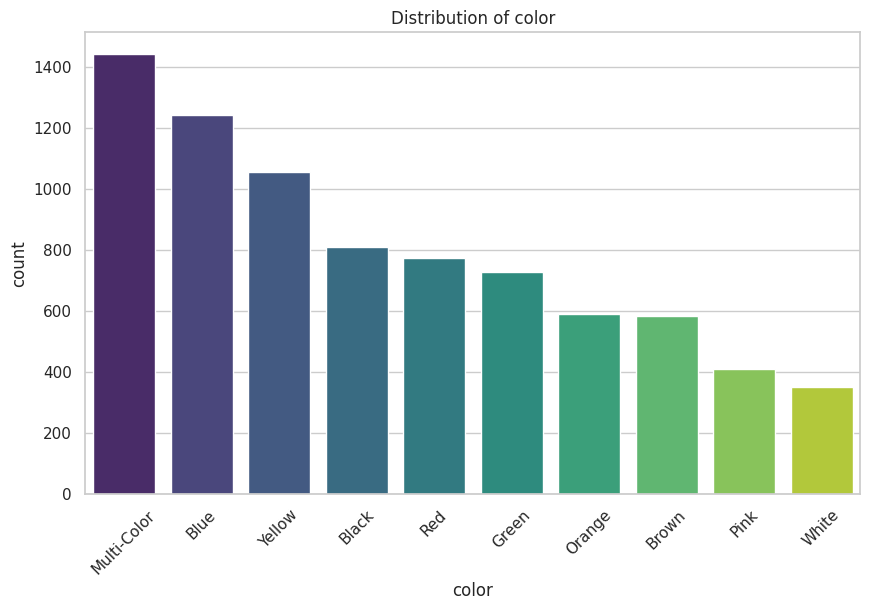

In [ ]:
# Distribution of numerical features
sns.histplot(historic_df['stars'], kde=True, color='blue')
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

# Countplot for categorical features
categorical_cols = ['category', 'main_promotion', 'color']
for col in categorical_cols:
    sns.countplot(data=historic_df, x=col, order=historic_df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


Stars colums is normally distributed

**category feature**

In [ ]:
historic_df['category'].value_counts()


,count
category,
Tunic,1650
Polo-Shirt,1546
T-Shirt,1459
Sweatshirt,1360
Blouse,1246
Hoodie,739


We need to do feature engineering on this because machine need to understand numerical value only.Will use label encoding to cater this

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders for category and main_promotion
le_category = LabelEncoder()
le_main_promotion = LabelEncoder()

# Fit and transform the 'category' column
historic_df['category_numeric'] = le_category.fit_transform(historic_df['category'])
# Retrieve and map original categories to their numeric values
encoded_categories = le_category.classes_
category_mapping = dict(zip(encoded_categories, le_category.transform(encoded_categories)))

# Fit and transform the 'main_promotion' column
historic_df['main_promotion_numeric'] = le_main_promotion.fit_transform(historic_df['main_promotion'])
# Retrieve and map original main promotions to their numeric values
encoded_promotions = le_main_promotion.classes_
promotion_mapping = dict(zip(encoded_promotions, le_main_promotion.transform(encoded_promotions)))

# Print the encoded values and their corresponding original categories
print("Category Mapping:")
for category, value in category_mapping.items():
    print(f"Encoded Category: {category}, Encoded Value: {value}")

print("\nMain Promotion Mapping:")
for promotion, value in promotion_mapping.items():
    print(f"Encoded Promotion: {promotion}, Encoded Value: {value}")


Category Mapping:
Encoded Category: Blouse, Encoded Value: 0
Encoded Category: Hoodie, Encoded Value: 1
Encoded Category: Polo-Shirt, Encoded Value: 2
Encoded Category: Sweatshirt, Encoded Value: 3
Encoded Category: T-Shirt, Encoded Value: 4
Encoded Category: Tunic, Encoded Value: 5

Main Promotion Mapping:
Encoded Promotion: Catalog, Encoded Value: 0
Encoded Promotion: Category_Highlight, Encoded Value: 1
Encoded Promotion: Display_Ad_Campaign, Encoded Value: 2
Encoded Promotion: Frontpage_Header, Encoded Value: 3


In [ ]:
historic_df.head()

,category,main_promotion,color,stars,success_indicator,category_numeric,main_promotion_numeric
0,Tunic,Catalog,Green,3.1,flop,5,0
1,Hoodie,Category_Highlight,Red,1.5,flop,1,1
2,Sweatshirt,Catalog,Red,4.4,top,3,0
3,Polo-Shirt,Category_Highlight,Blue,3.1,flop,2,1
4,Hoodie,Category_Highlight,Green,4.1,top,1,1


In [ ]:


# Initialize LabelEncoder for the color column
le_color = LabelEncoder()

# Fit and transform the 'color' column
historic_df['color_numeric'] = le_color.fit_transform(historic_df['color'])

# Retrieve and print the mapping
color_mapping = dict(zip(le_color.classes_, le_color.transform(le_color.classes_)))
print("Color Mapping:")
for color, value in color_mapping.items():
    print(f"Color: {color}, Numeric Value: {value}")


Color Mapping:
Color: Black, Numeric Value: 0
Color: Blue, Numeric Value: 1
Color: Brown, Numeric Value: 2
Color: Green, Numeric Value: 3
Color: Multi-Color, Numeric Value: 4
Color: Orange, Numeric Value: 5
Color: Pink, Numeric Value: 6
Color: Red, Numeric Value: 7
Color: White, Numeric Value: 8
Color: Yellow, Numeric Value: 9


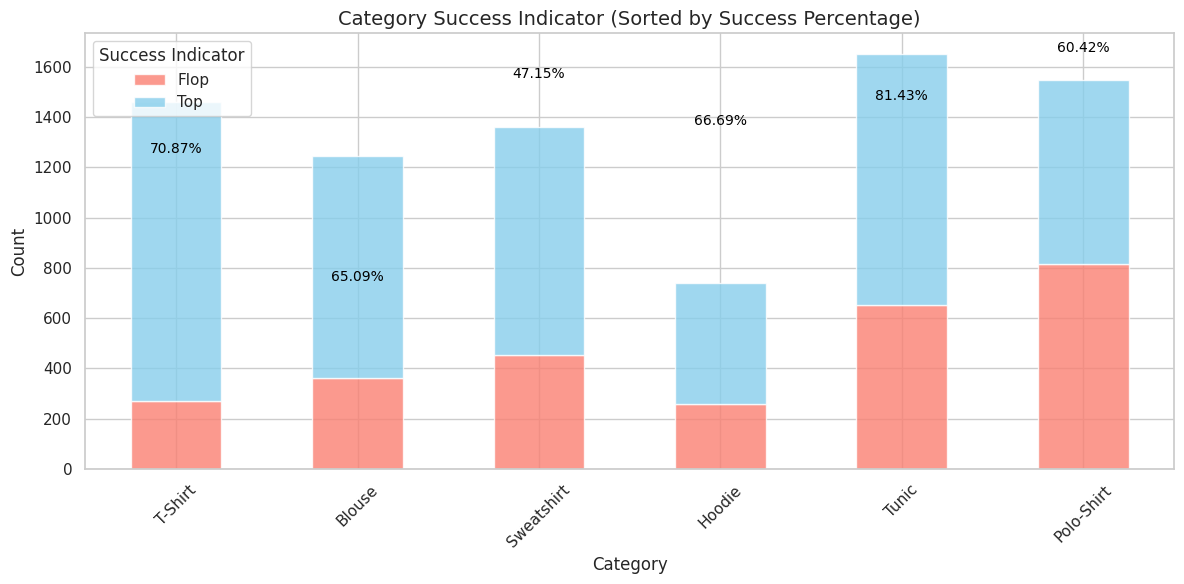

In [ ]:
# Group by category_numeric and calculate flop/top counts
category_stats = historic_df.groupby('category_numeric')['target'].value_counts().unstack().fillna(0)

# Rename columns for clarity
category_stats.columns = ['flop', 'top']

# Add total and top_percentage columns
category_stats['total'] = category_stats['flop'] + category_stats['top']
category_stats['top_percentage'] = (category_stats['top'] / category_stats['total'] * 100).round(2)

# Sort by top_percentage
sorted_stats = category_stats.sort_values('top_percentage', ascending=False)

# Map numeric categories back to their original names (optional)
sorted_stats['category'] = sorted_stats.index.map(dict(zip(le_category.transform(le_category.classes_), le_category.classes_)))


# Plot the sorted bar plot
fig, ax = plt.subplots(figsize=(12, 6))
sorted_stats[['flop', 'top']].plot(
    kind='bar', stacked=True, color=['salmon', 'skyblue'], ax=ax, alpha=0.8
)

# Overlay percentage as text on bars
for index, row in sorted_stats.iterrows():
    ax.text(
        x=index,
        y=row['total'] + 10,
        s=f"{row['top_percentage']}%",
        ha='center',
        fontsize=10,
        color='black',
    )

# Explicitly set x-axis labels
plt.xticks(ticks=range(len(sorted_stats)), labels=sorted_stats['category'], rotation=45)

# Set labels and title
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Category Success Indicator (Sorted by Success Percentage)', fontsize=14)
plt.legend(title='Success Indicator', labels=['Flop', 'Top'], loc='upper left')
plt.tight_layout()
plt.show()


**T-Shirt then percent of success indicator = TOP will be 81.43%**

Aggregated Main Promotion Statistics:

success_indicator    flop   top  total  success_rate
main_promotion                                      
Catalog               953  1293   2246         57.57
Category_Highlight    930  1502   2432         61.76
Display_Ad_Campaign   335   974   1309         74.41
Frontpage_Header      597  1416   2013         70.34


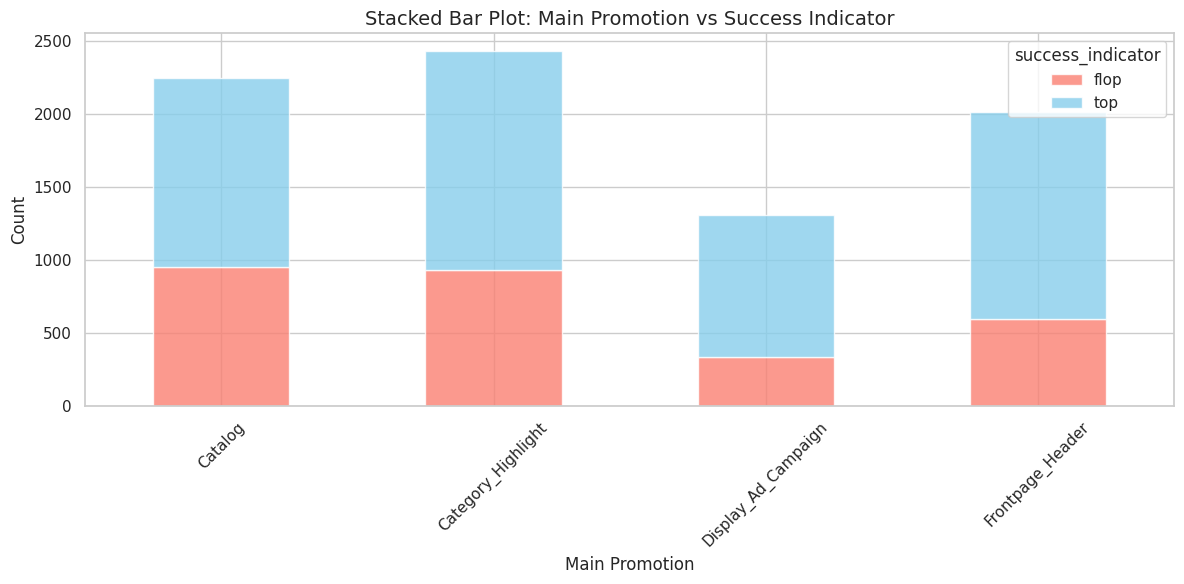


Success Rates by Main Promotion:

success_indicator    success_rate
main_promotion                   
Catalog                     57.57
Category_Highlight          61.76
Display_Ad_Campaign         74.41
Frontpage_Header            70.34


In [ ]:
# Group by main_promotion and success_indicator to calculate counts
main_promotion_stats = (
    historic_df.groupby(['main_promotion', 'success_indicator'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={'flop': 'flop', 'top': 'top'})
)

# Add a total column and calculate the success percentage
main_promotion_stats['total'] = main_promotion_stats['flop'] + main_promotion_stats['top']
main_promotion_stats['success_rate'] = (main_promotion_stats['top'] / main_promotion_stats['total'] * 100).round(2)

# Display the aggregated statistics
print("Aggregated Main Promotion Statistics:\n")
print(main_promotion_stats)

# Plot the stacked bar chart
main_promotion_stats[['flop', 'top']].plot(
    kind='bar', stacked=True, color=['salmon', 'skyblue'], alpha=0.8, figsize=(12, 6)
)
plt.xlabel('Main Promotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Stacked Bar Plot: Main Promotion vs Success Indicator', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print success rates for insights
print("\nSuccess Rates by Main Promotion:\n")
print(main_promotion_stats[['success_rate']])


**success rate is 57% for Catalog 61% Category_Highlight 74% Display_Ad_Campaign 70% Frontpage_Header**
company focus on frontpage header

# **Target Variable** **Analysis**

**Distribution of success_indicator**

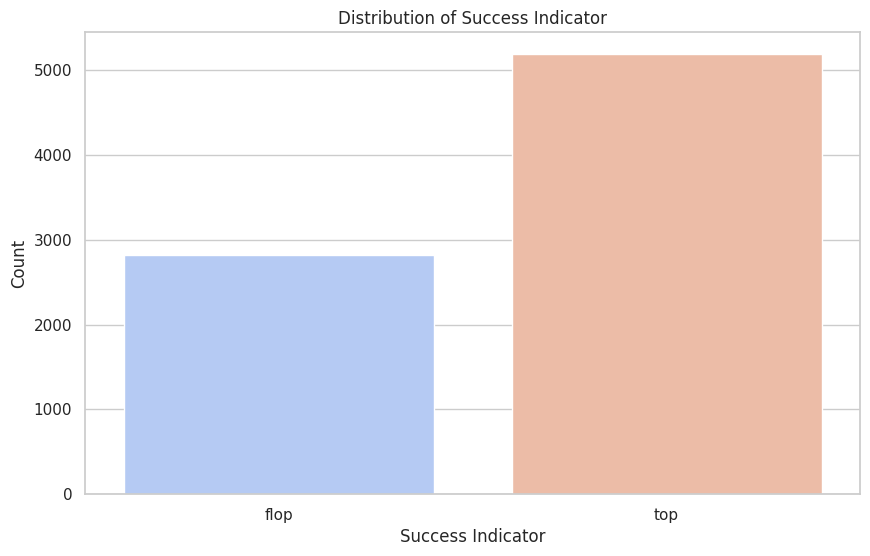


Class Distribution:
 success_indicator
top     5185
flop    2815
Name: count, dtype: int64

Class Percentages:
 success_indicator
top     64.8125
flop    35.1875
Name: count, dtype: float64


In [ ]:

sns.countplot(data=historic_df, x='success_indicator', palette='coolwarm')
plt.title('Distribution of Success Indicator')
plt.xlabel('Success Indicator')
plt.ylabel('Count')
plt.show()

# Quantify class imbalance
class_counts = historic_df['success_indicator'].value_counts()
class_percentages = (class_counts / len(historic_df)) * 100
print("\nClass Distribution:\n", class_counts)
print("\nClass Percentages:\n", class_percentages)


**Insight: The dataset is imbalanced, with more "flop" products than "top" products.**

# **Check for Outliers**

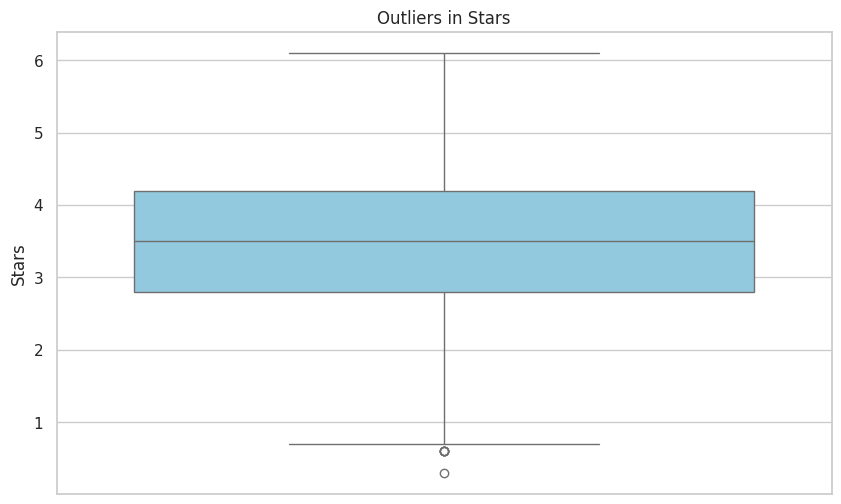

In [ ]:
# Outlier detection for stars
sns.boxplot(data=historic_df, y='stars', color='skyblue')
plt.title('Outliers in Stars')
plt.ylabel('Stars')
plt.show()

# Z-score for outlier detection
from scipy.stats import zscore

historic_df['zscore_stars'] = zscore(historic_df['stars'])
outliers = historic_df[np.abs(historic_df['zscore_stars']) > 3]



In stars columns some category having greater than 5 so as per given pdf max will be 5 star so we need to do capping

**Capping of 5 stars**

In [ ]:
# Cap 'stars' to a maximum value of 5
historic_df['stars'] = historic_df['stars'].apply(lambda x: min(x, 5))

# Display rows where 'stars' were capped
capped_rows = historic_df[historic_df['stars'] == 5]
print("Rows where 'stars' were capped to 5:\n", capped_rows)


Rows where 'stars' were capped to 5:
      category       main_promotion        color  stars success_indicator  \
9      Hoodie   Category_Highlight        White    5.0               top   
11     Hoodie   Category_Highlight        White    5.0               top   
30      Tunic   Category_Highlight         Blue    5.0              flop   
58    T-Shirt   Category_Highlight       Yellow    5.0               top   
78     Blouse   Category_Highlight        Green    5.0               top   
...       ...                  ...          ...    ...               ...   
7899   Hoodie  Display_Ad_Campaign       Yellow    5.0              flop   
7918  T-Shirt     Frontpage_Header  Multi-Color    5.0               top   
7934   Blouse  Display_Ad_Campaign        Green    5.0               top   
7937   Blouse     Frontpage_Header        Black    5.0               top   
7955  T-Shirt     Frontpage_Header  Multi-Color    5.0               top   

      category_numeric  main_promotion_numeric  c

# Bivariate Analysis

**Categorical Features vs. success_indicator**

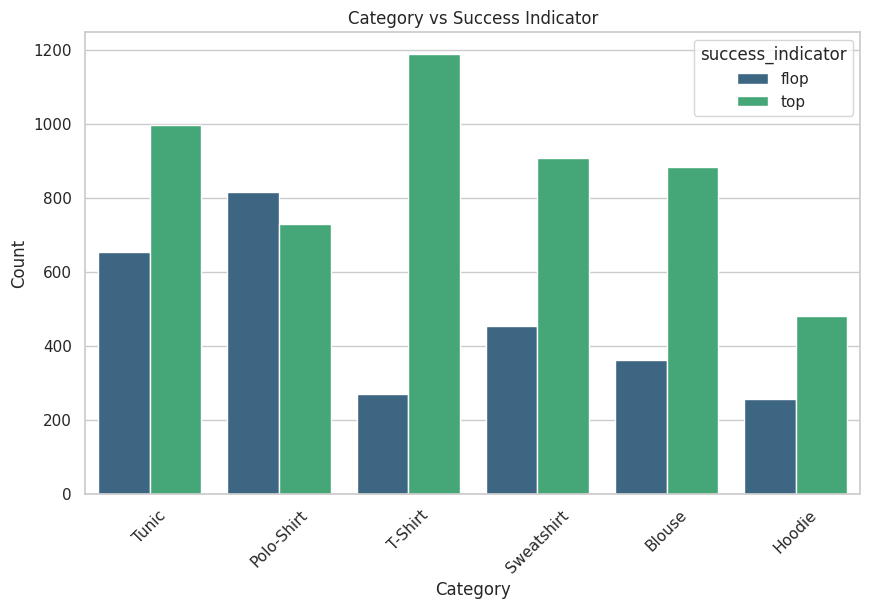

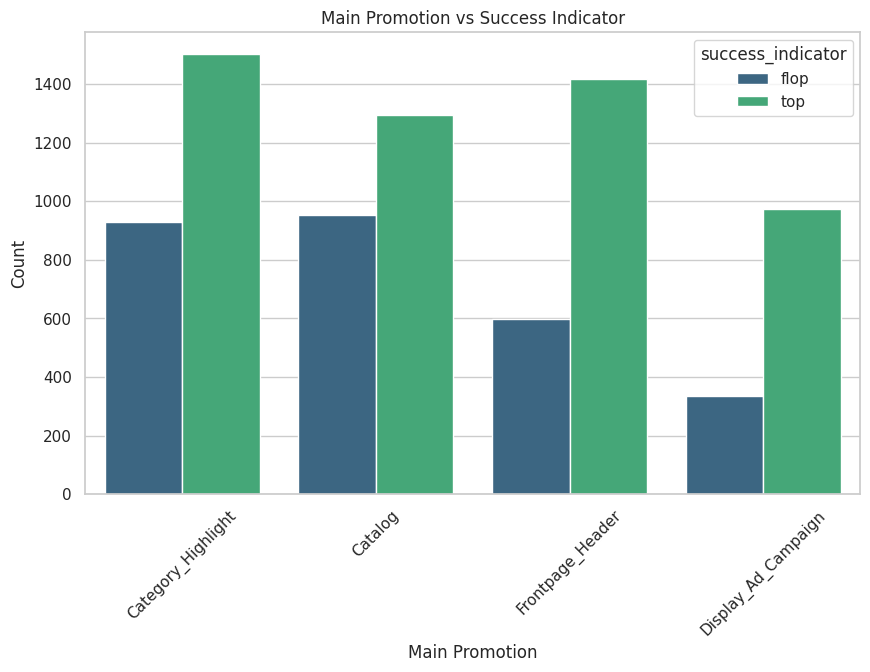

In [ ]:
# Relationship between category and success_indicator
sns.countplot(data=historic_df, x='category', hue='success_indicator', palette='viridis',
              order=historic_df['category'].value_counts().index)
plt.title('Category vs Success Indicator')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Relationship between main_promotion and success_indicator
sns.countplot(data=historic_df, x='main_promotion', hue='success_indicator', palette='viridis',
              order=historic_df['main_promotion'].value_counts().index)
plt.title('Main Promotion vs Success Indicator')
plt.xticks(rotation=45)
plt.xlabel('Main Promotion')
plt.ylabel('Count')
plt.show()


**Checking for Target variable Balance or imbalabce**

In [ ]:
historic_df['success_indicator'].value_counts()

,count
success_indicator,
top,5185
flop,2815


In [ ]:
# Map 'success_indicator' to binary values
historic_df['target'] = historic_df['success_indicator'].map({'flop': 0, 'top': 1})

# Display the updated DataFrame
print(historic_df[['success_indicator', 'target']].head())


  success_indicator  target
0              flop       0
1              flop       0
2               top       1
3              flop       0
4               top       1


Target Column Distribution:
target
1    5185
0    2815
Name: count, dtype: int64

Target Column Percentages:
target
1    64.81
0    35.19
Name: count, dtype: float64


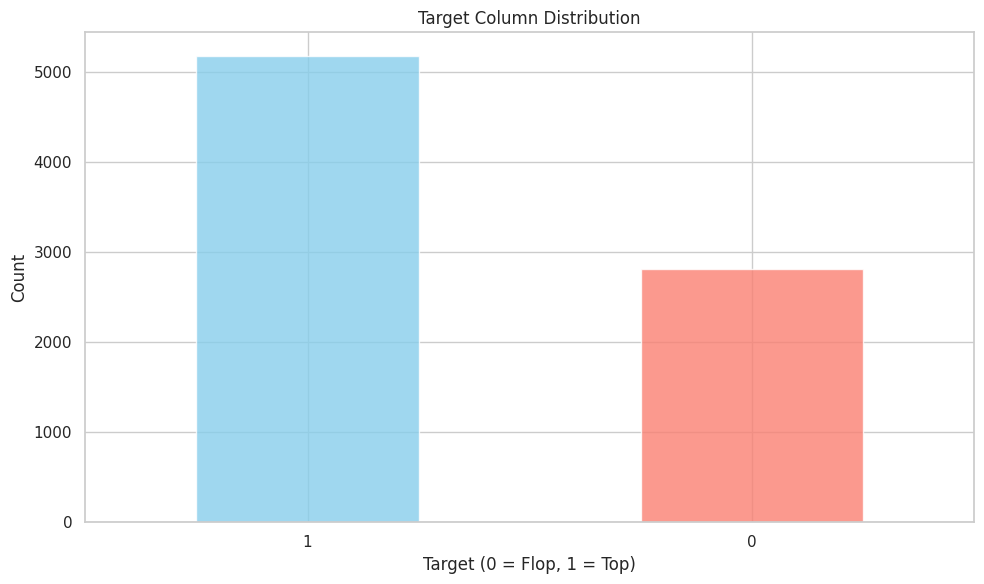

In [ ]:
# Check the distribution of the target column
target_counts = historic_df['target'].value_counts()
target_percentages = (target_counts / len(historic_df) * 100).round(2)

# Display the distribution
print("Target Column Distribution:")
print(target_counts)
print("\nTarget Column Percentages:")
print(target_percentages)

# Visualize the target distribution
import matplotlib.pyplot as plt
target_counts.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.8)
plt.title('Target Column Distribution')
plt.xlabel('Target (0 = Flop, 1 = Top)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


It looks like imbalanced dataset so we need apply some technique to get balanced dataset to avoid biasness with model
1. SMOTE(oversampling) we can use

Dropping Z-score table and apply SMOTE method on numerical columns so that target variable will be balanced

In [ ]:
from imblearn.over_sampling import SMOTE
# Drop unnecessary columns (e.g., zscore_stars)
historic_df = historic_df.drop(columns=['zscore_stars'])

# Separate features and target variable
X = historic_df[['category_numeric', 'main_promotion_numeric', 'color_numeric', 'stars']]  # Only numeric columns
y = historic_df['target']  # Target column

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Combine resampled features and target into a DataFrame (optional)
balanced_df = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.Series(y_smote, name='target')], axis=1)

# Check the target distribution after SMOTE
print("Target Distribution After SMOTE:")
print(y_smote.value_counts())


Target Distribution After SMOTE:
target
0    5185
1    5185
Name: count, dtype: int64


In [ ]:
print("Shape of Final Balanced Dataset:", balanced_df.shape)


Shape of Final Balanced Dataset: (10370, 5)


In [ ]:
final_df=balanced_df

# **Final Steps for Cleaning and Preparing the DataFrame:**

Voila!!!!
now this final df is totally converted to numeric so that machine can learn and identify pattern..

In [ ]:
final_df.head(10)

,category_numeric,main_promotion_numeric,color_numeric,stars,target
0,5,0,3,3.1,0
1,1,1,7,1.5,0
2,3,0,7,4.4,1
3,2,1,1,3.1,0
4,1,1,3,4.1,1
5,1,2,9,3.9,0
6,3,0,7,1.4,0
7,3,1,7,1.8,1
8,4,0,0,3.2,1
9,1,1,8,5.0,1


In [ ]:
final_df.to_csv('train_df.csv',index=False)

# **Insights**

**Dataset Overview**

1.  The dataset contains 5 key features:

Category: Product categories (e.g., T-Shirt, Hoodie, etc.).
main_promotion: Promotion methods used to market products.
Color: Various colors of the products.
stars: Ratings of the products (scale of 0 to 5).
Success_Indicator: The target variable, indicating TOP (success) or FLOP (failure).
2.  The item_no column has high variance (unique identifiers) and does not contribute to predictions. It has been dropped.

3.  The target variable Success_Indicator is imbalanced:

TOP: 64.8% (5185 instances)
FLOP: 35.2% (2815 instances)

**Key Insights from Bivariate Analysis**

1.  Category vs. Success Indicator:

T-Shirts have the highest success rate (81.42%), followed by Sweatshirts (66.69%).
Polo-Shirts have the lowest success rate (47.15%).
Recommendation: Focus on T-Shirts to maximize success.

2.  main_promotion vs. Success Indicator:

Promotions using Display_Ad_Campaign have the highest success rate (74.4%).
Frontpage_Header also performs well (70.34%).
Recommendation: Invest more in Display_Ad_Campaign and Frontpage_Header promotions.

3.  Color vs. Success Indicator:

Pink (78.88%), Black (76.72%), and White (74.71%) are the most successful colors.
Red has the lowest success rate (46.26%).
Recommendation: Launch products in Pink, Black, and White for better success rates.


**Actionable Recommendations**

**Product Category:**

Focus on producing and marketing T-Shirts and Sweatshirts.

**Promotion Strategy:**

Prioritize Display_Ad_Campaign and Frontpage_Header methods for higher product
 visibility and success.

**Product Colors:**

Invest in products with colors like Pink, Black, and White to maximize returns.
